In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from os import path
import pickle as pkl
from sklearn.decomposition import PCA
from collections import Counter

In [5]:
data_path = "../data/facebook_4000.gml"
output_dir = "../output/citeseer_deepwalk_corewalk_power_2020-02-12T16-16-37_0/"

In [6]:
# Load graph
graph: nx.Graph = nx.read_gml(data_path)
core_number = nx.core_number(graph)

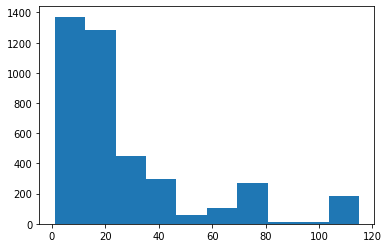

k-core : 115
Number of nodes in k-core : 158
Number of nodes : 4039


In [10]:
core = nx.k_core(graph)
core_number = nx.core_number(graph)
plt.hist(core_number.values())
plt.show()

print("k-core : {}".format(max(core_number.values())))
print("Number of nodes in k-core : {}".format(len(core)))
print("Number of nodes : {}".format(len(graph.nodes)))

In [132]:
base_embedding_path = path.join(output_dir, "embeddings/embeddings_base_0.pkl")
target_embedding_path = path.join(output_dir, "embeddings/embeddings_target_0.pkl")

with open(base_embedding_path, "rb") as fin:
    base_emb = pkl.load(fin)

with open(target_embedding_path, "rb") as fin:
    target_emb = pkl.load(fin)


In [133]:
graph = nx.read_gml(data_path)
core_numbers = nx.core_number(graph)

In [134]:
graph.order(), core_numbers

(2708,
 {'344': 2,
  '345': 2,
  '346': 4,
  '347': 4,
  '340': 2,
  '341': 3,
  '342': 2,
  '343': 1,
  '348': 2,
  '349': 1,
  '1653': 1,
  '2318': 3,
  '2319': 3,
  '2316': 3,
  '2317': 3,
  '2314': 3,
  '2315': 1,
  '2312': 3,
  '2313': 3,
  '2310': 1,
  '2311': 2,
  '298': 3,
  '299': 3,
  '296': 3,
  '297': 3,
  '294': 2,
  '295': 1,
  '292': 3,
  '293': 1,
  '290': 1,
  '291': 1,
  '2147': 3,
  '270': 4,
  '271': 4,
  '272': 4,
  '273': 3,
  '274': 1,
  '275': 4,
  '276': 3,
  '277': 4,
  '278': 4,
  '279': 2,
  '1780': 2,
  '2146': 3,
  '2268': 4,
  '2269': 2,
  '2262': 3,
  '2263': 3,
  '2260': 1,
  '2261': 1,
  '2266': 2,
  '2267': 4,
  '2264': 2,
  '2265': 3,
  '2442': 3,
  '2443': 2,
  '2440': 2,
  '2441': 2,
  '1781': 2,
  '2447': 3,
  '2444': 2,
  '2445': 3,
  '2448': 3,
  '2449': 3,
  '2189': 2,
  '108': 3,
  '109': 2,
  '102': 1,
  '103': 3,
  '100': 2,
  '101': 3,
  '106': 2,
  '107': 2,
  '104': 3,
  '105': 1,
  '2046': 3,
  '2047': 2,
  '2044': 3,
  '2045': 3,
  '204

In [167]:
def plot_emb_core(vectors, id2node, core_numbers, min_core=0, max_core=1000):
    pca = PCA(n_components=2)
    projected_vectors = pca.fit_transform(vectors)
    id2core = [core_numbers[node] for node in id2node if min_core <= core_numbers[node] <= max_core]    
    to_be_plot = np.array([vector for i, vector in enumerate(projected_vectors) if min_core <= core_numbers[id2node[i]] <= max_core])
    plt.scatter(to_be_plot.T[0], to_be_plot.T[1], marker='.', alpha=0.5, 
               c=id2core, cmap="plasma")
    plt.colorbar()


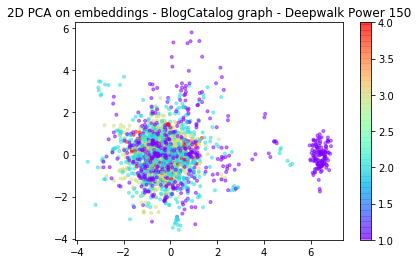

In [136]:
vectors, node2id, id2node = base_emb.values()

plot_emb_core(vectors, id2node, core_numbers, min_core=0, max_core=114)
plt.title("2D PCA on embeddings - BlogCatalog graph - Deepwalk Power 150")
plt.show()

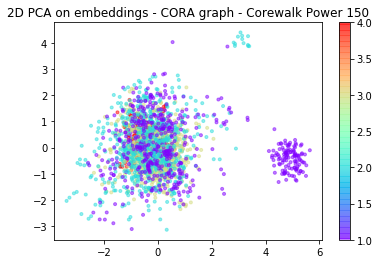

In [137]:
vectors, node2id, id2node = target_emb.values()

plot_emb_core(vectors, id2node, core_numbers)
plt.title("2D PCA on embeddings - CORA graph - Corewalk Power 150")
plt.show()

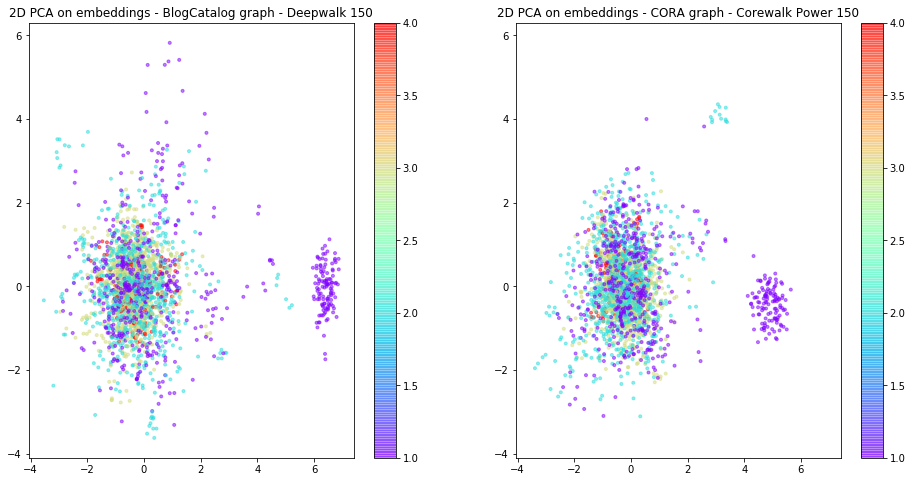

In [138]:
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(121)
vectors, node2id, id2node = base_emb.values()
plot_emb_core(vectors, id2node, core_numbers, min_core=0)  #, min_core=0, max_core=114)
plt.title("2D PCA on embeddings - BlogCatalog graph - Deepwalk 150")
plt.subplot(122, sharex=ax, sharey=ax)
vectors, node2id, id2node = target_emb.values()
plot_emb_core(vectors, id2node, core_numbers, min_core=0)
plt.title("2D PCA on embeddings - CORA graph - Corewalk Power 150")
plt.show()

In [127]:
pca.

array([64.17374 , 49.344917], dtype=float32)

In [129]:
import pandas as pd

base = pd.read_csv(output_dir + "base_metrics.csv")
target = pd.read_csv(output_dir + "target_metrics.csv")

In [130]:
base.head()

,out_dim,exec_times,n_walks,walk_length,window_size,n_generated_walks,micro_f1,macro_f1
0,150,"{'generate_walks': 47.01440620422363, 'skip_gr...",30,50,10,81240,0.726154,0.703087
1,150,"{'generate_walks': 45.65590023994446, 'skip_gr...",30,50,10,81240,0.731077,0.715282
2,150,"{'generate_walks': 46.8471884727478, 'skip_gra...",30,50,10,81240,0.731077,0.719826
3,150,"{'generate_walks': 45.75762891769409, 'skip_gr...",30,50,10,81240,0.712615,0.708608


In [131]:
target.head()

,out_dim,exec_times,n_walks,walk_length,window_size,n_generated_walks,micro_f1,macro_f1
0,150,"{'k_core_decomposition': 0.012970685958862305,...",30,50,10,46235,0.737846,0.726773
1,150,"{'k_core_decomposition': 0.012963533401489258,...",30,50,10,46235,0.739077,0.722464
2,150,"{'k_core_decomposition': 0.012964963912963867,...",30,50,10,46235,0.741538,0.734045
3,150,"{'k_core_decomposition': 0.012964487075805664,...",30,50,10,46235,0.737846,0.724522


In [141]:
with open("../../embeddings_target_1.pkl", "rb") as p:
    emb = pkl.load(p)

In [143]:
emb.keys()

dict_keys(['embeddings', 'node2id', 'id2node'])

In [177]:
min_core = 2
max_core = 2

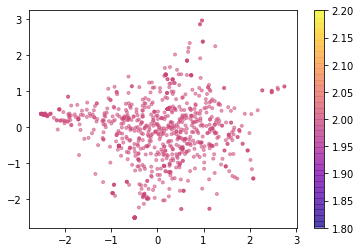

In [178]:
vectors, node2id, id2node = emb.values()
graph = nx.read_gml("../data/cora.gml")
core_numbers = nx.core_number(graph)
plot_emb_core(vectors, id2node, core_numbers, min_core=min_core, max_core=max_core)

Text(0.5, 1.0, '2D PCA on embeddings - BlogCatalog graph - Deepwalk 150')

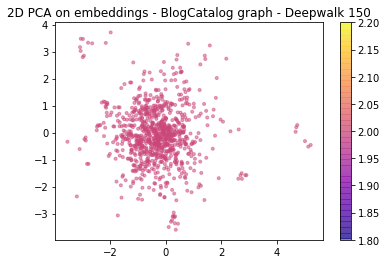

In [179]:
vectors, node2id, id2node = base_emb.values()
plot_emb_core(vectors, id2node, core_numbers, min_core=min_core, max_core=max_core)  #, min_core=0, max_core=114)
plt.title("2D PCA on embeddings - BlogCatalog graph - Deepwalk 150")